# Probability primer

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import binom
import numpy as np

A random variable *x* denotes a quantity that is uncertain. It may be *discrete* (takes only certain values) or *continuous* (take any value on a continuum).
If we observe several instances of a random variable *x*, it will take different values, and the relative propensity to take different values is described by a *probability distribution* *Pr(x)*.

For a discrete variable, the distribution *Pr(x)* associates a probability *Pr(x==k) in [0, 1]* with each potential outcome *k*, and the sum of these probabilities is *1*. This is called Probability Mass Function. For a continuous variable, there is a non-negative probability density *Pr(x==a) >= 0* associated with each value a in the domain of *x*. This is called Probability Density Function. The integral if the PDF over this domain must be *1*.

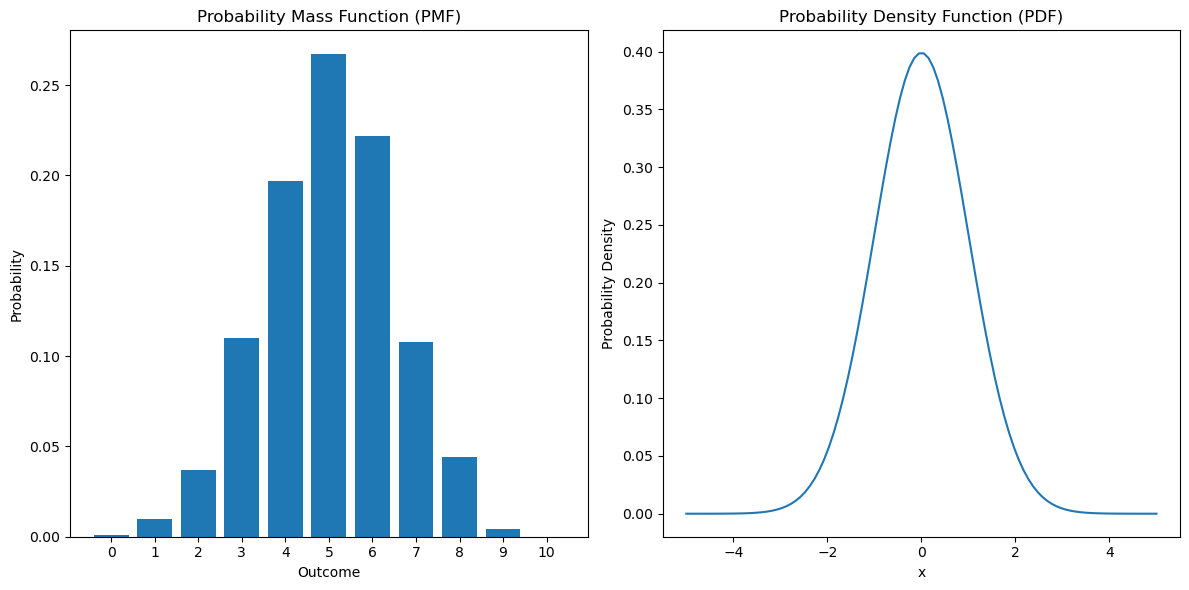

In [2]:
def gauss(x, mean=0, std_dev=1):
    normalization = 1 / (std_dev * np.sqrt(2 * np.pi)) 
    return normalization * np.exp(-(x - mean) ** 2 / (2 * std_dev ** 2))

# Generate x and P(x) values for the PDF
x_pdf = np.linspace(-5, 5, 100)
y_pdf = gauss(x_pdf)


def binomial(n, p=0.5):
    """
    Generate random samples for the PMF using a binomial distribution.
    n = number of trials for the binomial distribution
    p = probability of success
    """
    samples = binom.rvs(n, p, size=1000)  # Generate 1000 samples
    y, _ = np.histogram(samples, bins=np.arange(-0.5, n + 1.5, 1), density=True)
    return y

# Create a histogram for the PMF
n = 10  # Number of trials for the binomial distribution
x_pmf = np.arange(0, n + 1)  # Possible outcomes
y_pmf = binomial(n)

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the PMF
axs[0].bar(x_pmf, y_pmf, width=0.8)
axs[0].set_title('Probability Mass Function (PMF)')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Probability')
axs[0].set_xticks(x_pmf)
# axs[0].grid()

# Plot the PDF
axs[1].plot(x_pdf, y_pdf)
axs[1].set_title('Probability Density Function (PDF)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability Density')
# axs[1].grid()

plt.tight_layout()
plt.show()

In [3]:
# Compute the integral of the PDF over the range [-5, 5]
pdf_integral_value, pdf_error = quad(gauss, -5, 5)

# Compute the sum of the PMF
pmf_sum_value = np.sum(y_pmf)

print(f'Integral over PDF: {pdf_integral_value}')
print(f'Sum over PMF: {pmf_sum_value}')

Integral over PDF: 0.9999994266968562
Sum over PMF: 1.0


Let's focus on continuous functions. The following concepts apply also to discrete functions.

We will use multiple gaussians distributions to build a single non-standard probability density function.

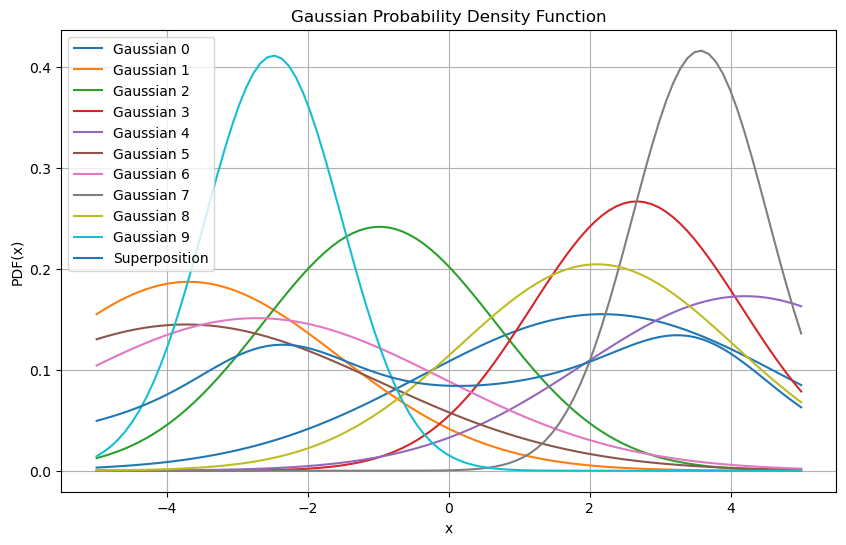

In [4]:
def randomgauss(x, n=3):
    """
    Returns n gaussians with random means and random standard 
    deviations on the same x range
    """
    
    means = np.random.uniform(low=x[0], high=x[-1], size=(n, ))
    std_devs = np.random.uniform(low=0.5, high=3, size=(n, ))
    
    gaussians = []
    for i in range(n):
        gaussians.append(gauss(x, means[i], std_devs[i]))
    
    return np.array(gaussians)

def multigauss(gaussians):
    """
    Put together the gaussians and normalize them in order to obtain
    a single gaussian PDF. 
    """

    y = np.zeros_like(x)
    for gaussian in gaussians:
        y += gaussian

    # Compute the integral of the superposition
    integral = np.trapz(y, x)

    # Return normalized superposition
    return y / integral

x = np.linspace(-5, 5, 100)
gaussians = randomgauss(x, n=10)

plt.figure(figsize=(10, 6))

# Plot each gaussian as it is
for i, gaussian in enumerate(gaussians):
    plt.plot(x, gaussian, label=f'Gaussian {i}')

pdf_multigauss = multigauss(gaussians)

plt.plot(x, pdf_multigauss, label='Superposition')

plt.title('Gaussian Probability Density Function')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.legend()
plt.grid()
plt.show()

Let's build two of them

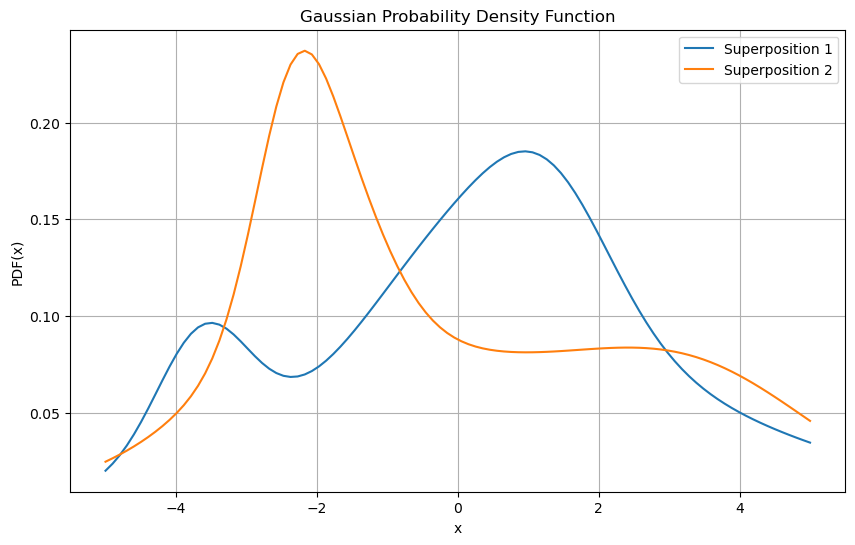

In [5]:
pdf_1 = multigauss(randomgauss(x, n=10))
pdf_2 = multigauss(randomgauss(x, n=10))

plt.figure(figsize=(10, 6))

plt.plot(x, pdf_1, label='Superposition 1')
plt.plot(x, pdf_2, label='Superposition 2')

plt.title('Gaussian Probability Density Function')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.legend()
plt.grid()
plt.show()

The *joint distribution Pr(x, y)* tells us about the propensity that *x* and *y* take particula combinations of values. Being a PDF in turn, its integral should be *1*. 

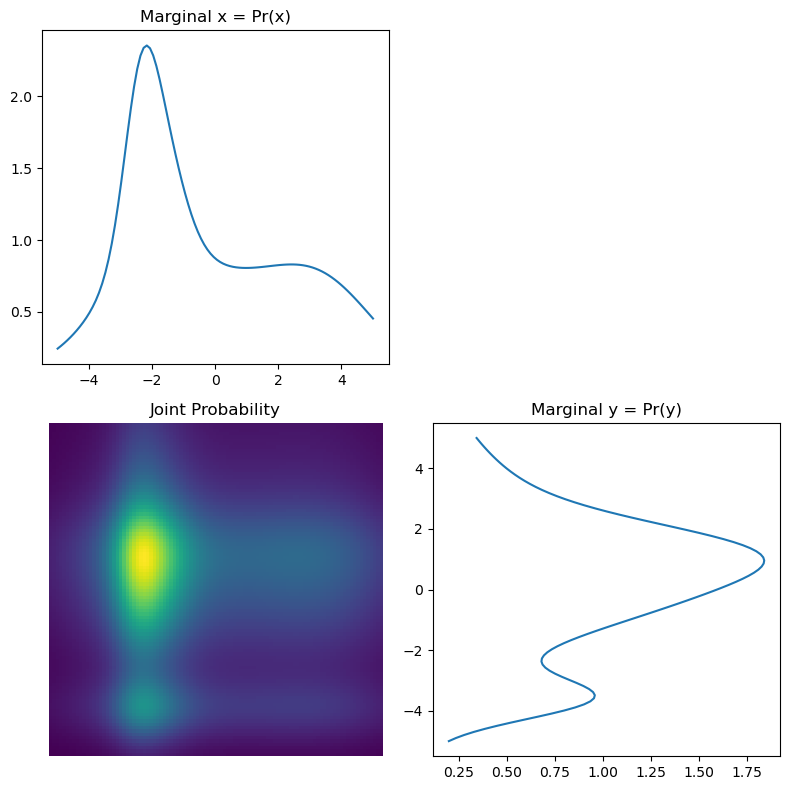

In [6]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Create the joint PDF
joint_pdf = np.outer(pdf_1, pdf_2)

# Plot in the top left subplot
marginal_x = np.sum(joint_pdf, axis=0)  # Sum (integrating) over the columns (x) = marginalization of x = Pr(x)
axs[0, 0].plot(x, marginal_x, label='PDF 1')
axs[0, 0].set_title('Marginal x = Pr(x)')

# Plot in the bottom right subplot
marginal_y = np.sum(joint_pdf, axis=1)  # Sum (integrating) over the rows (y) = marginalization of y = Pr(y)
axs[1, 1].plot(marginal_y, x, label='PDF 2')
axs[1, 1].set_title('Marginal y = Pr(y)')

axs[1, 0].imshow(joint_pdf[::-1, :]) # Handle the difference in plotting between an image and an array
axs[1, 0].axis('off')  # Hide axes for the image subplot
axs[1, 0].set_title('Joint Probability')

# Disable the top right subplot
axs[0, 1].axis('off')  # Hide the top right subplot

# Adjust layout
plt.tight_layout()
plt.show()


We can show the same thing for a discrete random variable:

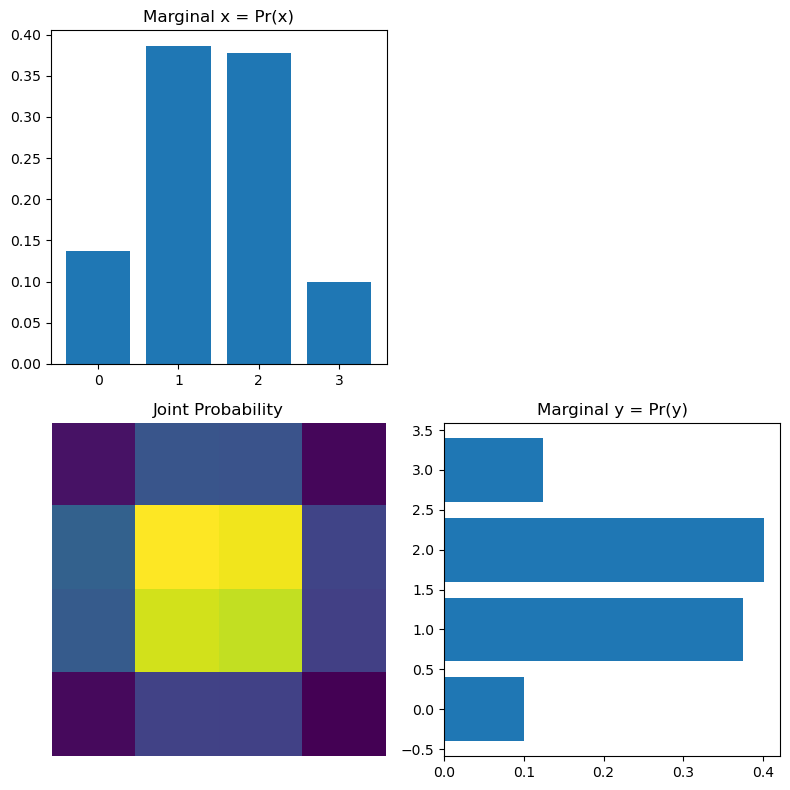

In [7]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

n = 3
x = np.arange(0, n + 1)  # Possible outcomes
pdf_1 = binomial(n)
pdf_2 = binomial(n)

# Create the joint PDF
joint_pdf = np.outer(pdf_1, pdf_2)

# Plot in the top left subplot
marginal_x = np.sum(joint_pdf, axis=0)  # Sum (integrating) over the columns (x) = marginalization of x = Pr(x)
axs[0, 0].bar(x, marginal_x, width=0.8, label='PDF 1')
axs[0, 0].set_title('Marginal x = Pr(x)')

# Plot in the bottom right subplot
marginal_y = np.sum(joint_pdf, axis=1)  # Sum (integrating) over the rows (y) = marginalization of y = Pr(y)
axs[1, 1].barh(x, marginal_y, height=0.8, label='PDF 2')
axs[1, 1].set_title('Marginal y = Pr(y)')

axs[1, 0].imshow(joint_pdf[::-1, :]) # Handle the difference in plotting between an image and an array
axs[1, 0].axis('off')  # Hide axes for the image subplot
axs[1, 0].set_title('Joint Probability')

# Disable the top right subplot
axs[0, 1].axis('off')  # Hide the top right subplot

# Adjust layout
plt.tight_layout()
plt.show()
